# Multiple Models Analysis

In [1]:
# Import Everything we need
import setup

from DLAnalysis.Scan import *
from DLAnalysis.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# Choose the Models to look at
import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels/*.1"))
ModelDirs=glob.glob("TrainedModels/*.2")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

Failed to load model from: TrainedModels/CaloDNN_512_4_0.01_Adam_0.01_Merged.2
Failed to load model from: TrainedModels/CaloDNN_256_2_0.01_RMSprop_0.01_Merged.2
Failed to load model from: TrainedModels/CaloDNN_128_2_0.001_RMSprop_0.01_Merged.2


In [3]:
# Prep the Models

# Rename the Models using Width and Depth
#ResetNames(MyModels,["Width","Depth","lr","decay","optimizer"])
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 

Historical Parameters: ['All_ChPi_AUC', 'All_Ele_AUC', 'All_Gamma_AUC', 'All_Pi0_AUC', 'All_Width', 'All_History.val_acc', 'All_History.loss', 'All_HyperParamSet', 'All_History.val_loss', 'All_History.acc', 'All_decay', 'All_lr', 'All_Depth']


In [4]:
# Get a List of all numbers stored in MetaData
print "Available Parameters:", GetGoodParams(MyModels)

Available Parameters: ['Ele_AUC', 'Width', 'Depth', 'Pi0_AUC', 'HyperParamSet', 'decay', 'lr', 'Epochs', 'Gamma_AUC', 'ChPi_AUC']


In [5]:
# Make a Table of all relevant parameter
# Note: Parameters are optional... but the columns and rows will be not optimally sorted.
ScanTable(MyModels,['Model Name', 'optimizer', 'Epochs', "lr","decay",'Pi0_AUC','Gamma_AUC','Ele_AUC','ChPi_AUC'],[5,6,7,8])

Model Name         optimizer      Epochs      lr    decay    Pi0_AUC    Gamma_AUC    Ele_AUC    ChPi_AUC
-----------------  -----------  --------  ------  -------  ---------  -----------  ---------  ----------
Width=32 Depth=1   'RMSprop'          24  0.0100   0.0100     0.8421       0.8697     0.9437      0.9848
Width=256 Depth=3  'Adam'             30  0.0100   0.0010     0.8477       0.8269     0.9256      0.9784
Width=64 Depth=2   'RMSprop'         100  0.0100   0.0010     0.8914       0.8732     0.9386      0.9737
Width=512 Depth=3  'RMSprop'          51  0.0100   0.0010     0.8941       0.8822     0.9481      0.9843
Width=512 Depth=4  'RMSprop'          80  0.0010   0.0010     0.8960       0.8824     0.9550      0.9512
Width=512 Depth=3  'Adam'             56  0.0010   0.0010     0.8991       0.8731     0.9553      0.9551
Width=512 Depth=4  'RMSprop'          65  0.0010   0.0100     0.9016       0.8870     0.9405      0.9684
Width=128 Depth=3  'RMSprop'          77  0.0010   0.00

Number of Models: 6
Model Name                                Pi0_AUC    Gamma_AUC    Ele_AUC    ChPi_AUC    FinalScore[0]
--------------------------------------  ---------  -----------  ---------  ----------  ---------------
Width=256 Depth=3 lr=0.01 decay=0.001      0.8477       0.8269     0.9256      0.9784           1.7920
Width=512 Depth=3 lr=0.001 decay=0.001     0.8991       0.8731     0.9553      0.9551           3.3454
Width=512 Depth=2 lr=0.001 decay=0.001     0.9116       0.8956     0.9592      0.9858           2.1222
Width=128 Depth=4 lr=0.01 decay=0.01       0.9155       0.8997     0.9735      0.9969           0.8354
Width=256 Depth=4 lr=0.01 decay=0.01       0.9205       0.8902     0.9657      0.9907           0.8318
Width=512 Depth=3 lr=0.001 decay=0.01      0.9219       0.8936     0.9716      0.9910           0.8478


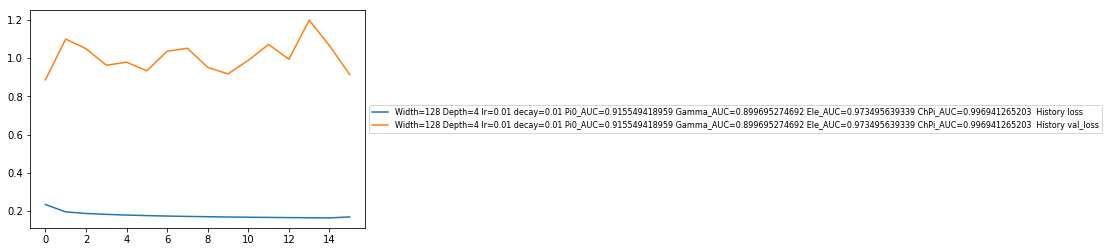

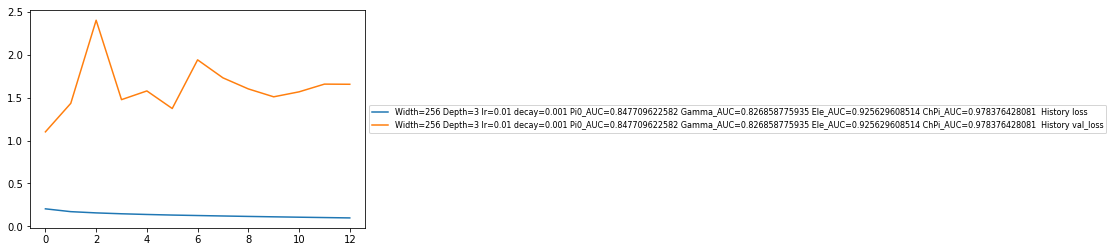

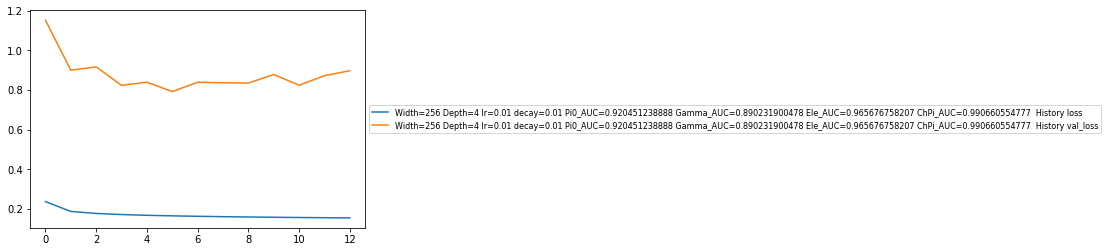

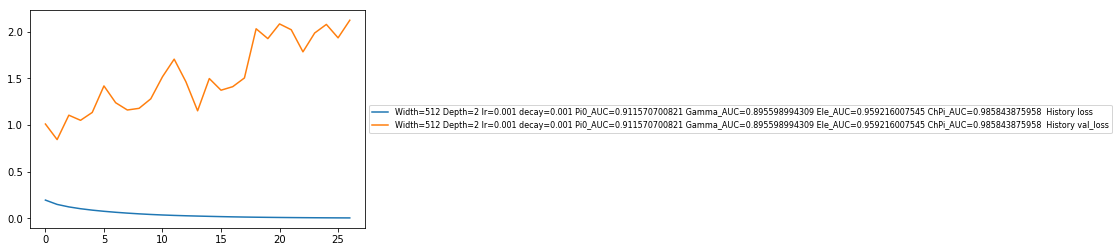

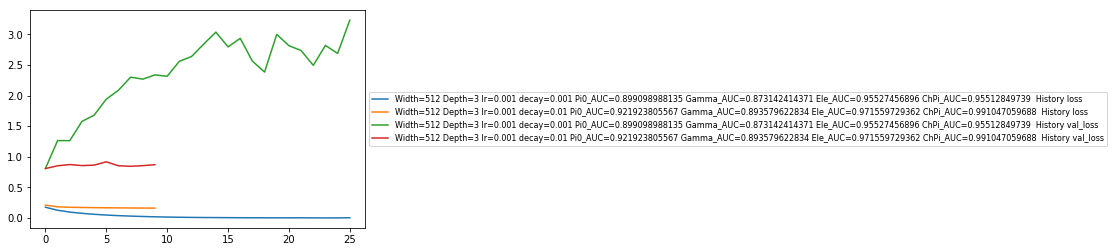

In [6]:
# Plot Historical MetaData... put 4 models per plot
#PlotMetaDataMany(MyModels,4,["History","val_loss"],loc="center left")
def AnalyzeSubset(expression,labels=["Width","Depth","lr","decay"]):
    ResetNames(MyModels,labels)
    M1=SelectModels(MyModels,MetaDataEvaluator(expression,params=["optimizer"]))
    print "Number of Models:",len(M1)
    ScanTable(M1,['Model Name','Pi0_AUC','Gamma_AUC','Ele_AUC','ChPi_AUC',"FinalScore[0]"],[1,2,3,4])
    ResetNames(MyModels,["Width","Depth","lr","decay",'Pi0_AUC','Gamma_AUC','Ele_AUC','ChPi_AUC'])
    PlotMetaDataMany(M1,4,
                     [["History","loss"],["History","val_loss"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")
    
AnalyzeSubset("optimizer=='Adam'")

Number of Models: 5
Model Name                               Pi0_AUC    Gamma_AUC    Ele_AUC    ChPi_AUC    FinalScore[0]
-------------------------------------  ---------  -----------  ---------  ----------  ---------------
Width=64 Depth=2 lr=0.01 decay=0.001      0.8914       0.8732     0.9386      0.9737           1.1606
Width=512 Depth=3 lr=0.01 decay=0.001     0.8941       0.8822     0.9481      0.9843           1.2453
Width=512 Depth=2 lr=0.01 decay=0.001     0.9136       0.8878     0.9668      0.9933           1.1760
Width=256 Depth=4 lr=0.01 decay=0.001     0.9169       0.8716     0.9562      0.9836           1.1706
Width=128 Depth=3 lr=0.01 decay=0.001     0.9313       0.8865     0.9554      0.9857           1.1669


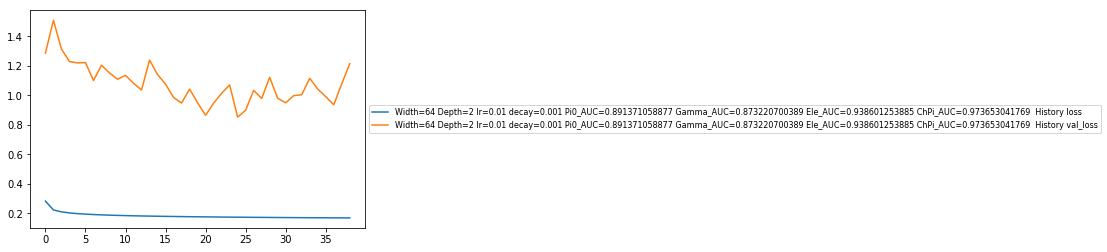

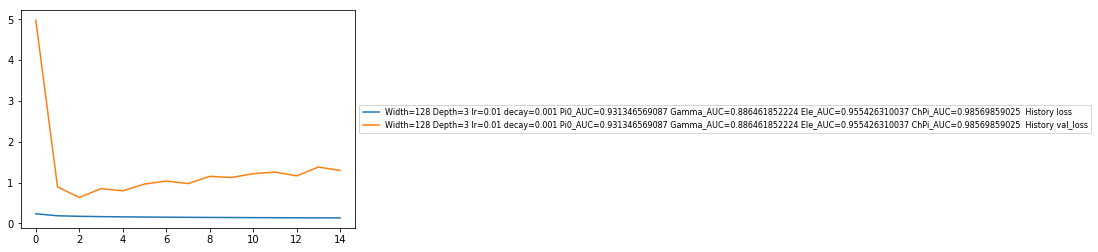

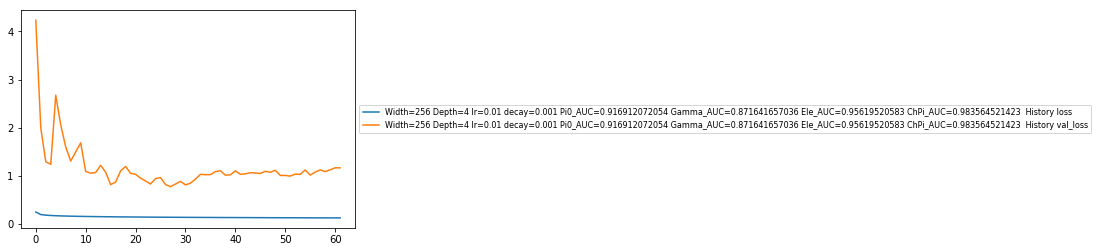

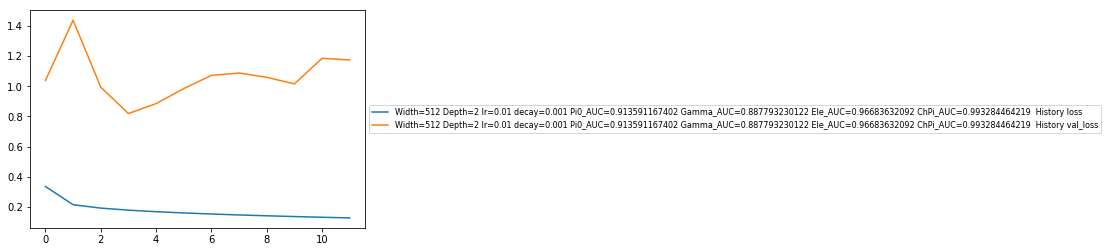

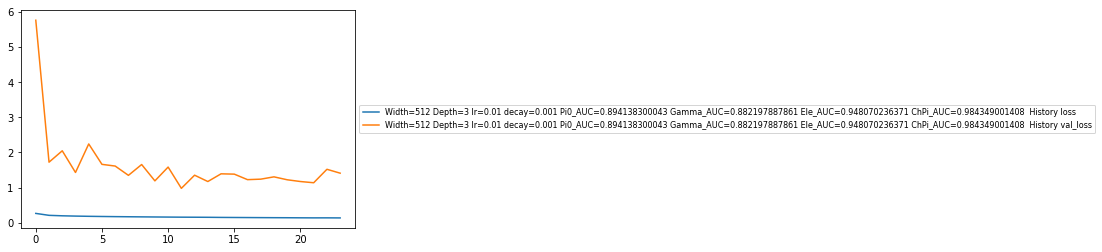

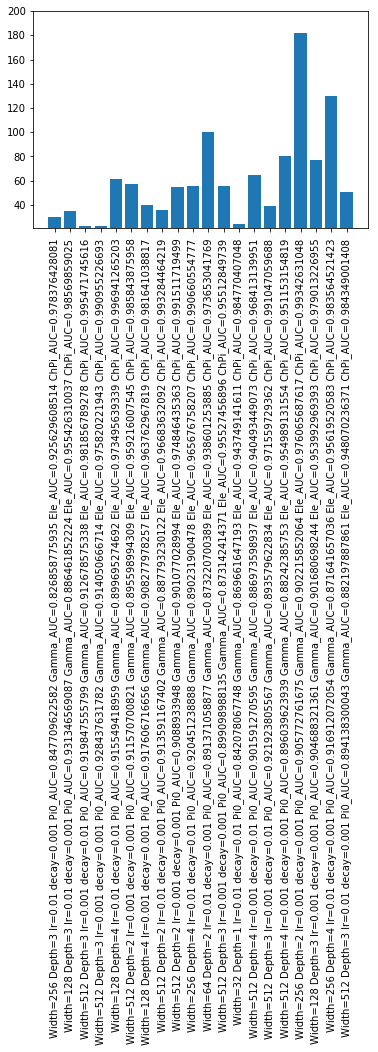

In [7]:
AnalyzeSubset("optimizer=='RMSprop' and lr==0.01 and decay==0.001")

# Compare Number of Epochs each model ran (only last run)
PlotMetaData(MyModels,["Epochs"])

Number of Models: 6
Model Name                                                                      Pi0_AUC    Gamma_AUC    Ele_AUC    ChPi_AUC    FinalScore[0]
----------------------------------------------------------------------------  ---------  -----------  ---------  ----------  ---------------
Width=128 Depth=3 lr=0.001 decay=0.001 optimizer='RMSprop' HyperParamSet=153     0.9047       0.9017     0.9540      0.9790           0.8116
Width=256 Depth=2 lr=0.001 decay=0.001 optimizer='RMSprop' HyperParamSet=105     0.9058       0.9022     0.9761      0.9934           1.2896
Width=512 Depth=2 lr=0.001 decay=0.001 optimizer='RMSprop' HyperParamSet=117     0.9089       0.9011     0.9748      0.9915           1.0981
Width=128 Depth=4 lr=0.001 decay=0.001 optimizer='RMSprop' HyperParamSet=213     0.9176       0.9083     0.9638      0.9816           0.7374
Width=512 Depth=3 lr=0.001 decay=0.01 optimizer='RMSprop' HyperParamSet=171      0.9198       0.9127     0.9819      0.9955           

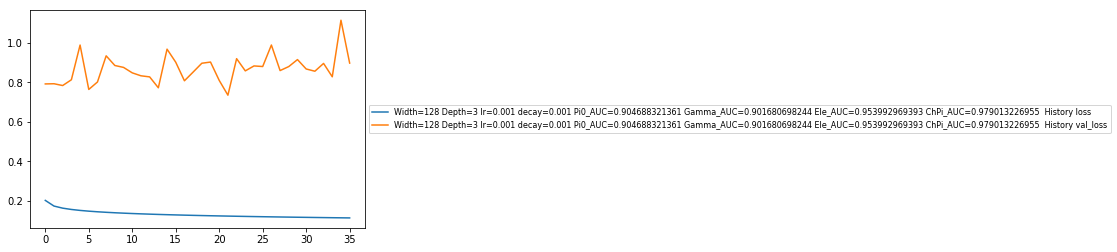

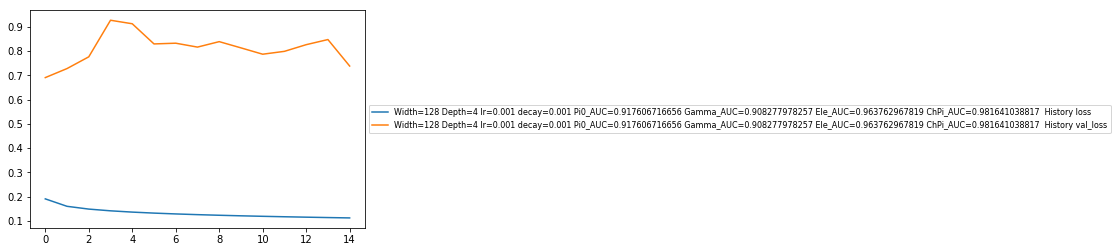

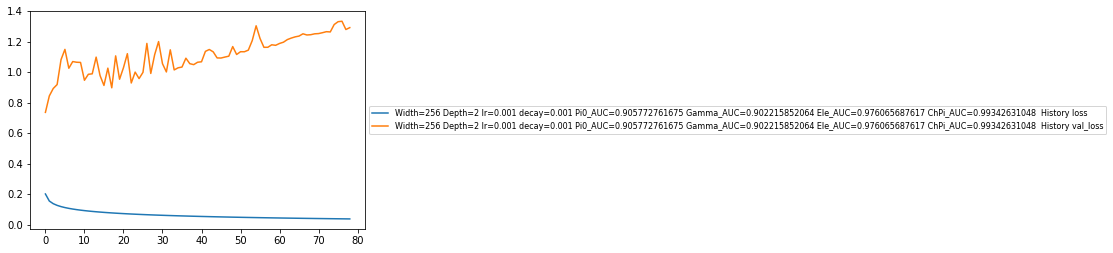

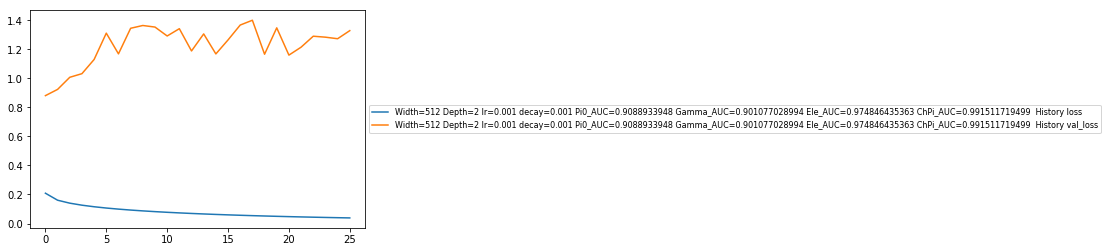

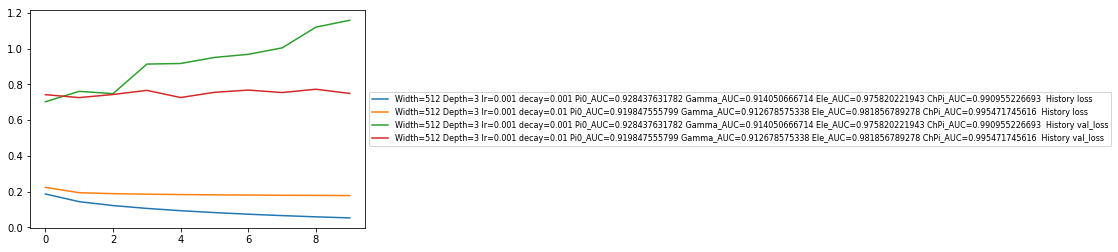

In [10]:
AnalyzeSubset("Pi0_AUC> 0.90 and Gamma_AUC>0.9", labels=["Width","Depth","lr","decay","optimizer","HyperParamSet"])



Ele_AUC


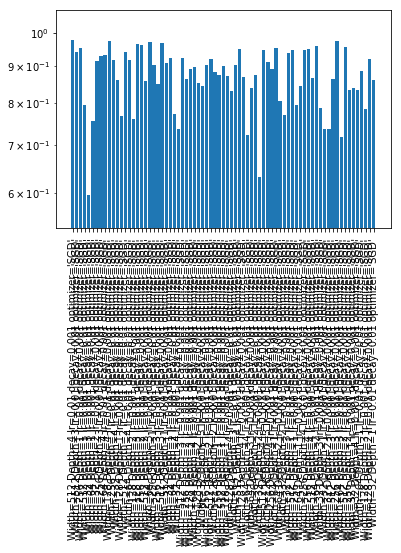

Pi0_AUC


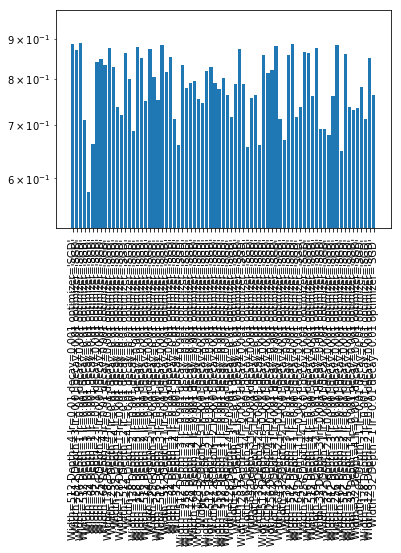

ChPi_AUC


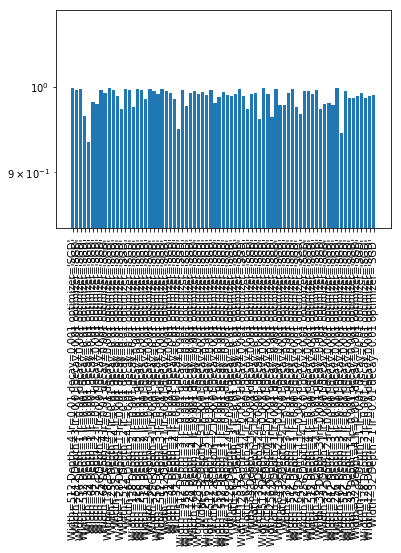

Gamma_AUC


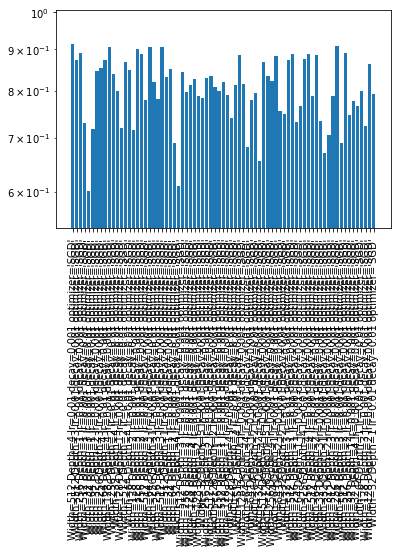

In [8]:
# Compare AUCs
for p in ['Ele_AUC', 'Pi0_AUC', 'ChPi_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(SelectModels(MyModels,MetaDataEvaluator("optimizer=='SGD'",params=["optimizer"])),[p],log=True)
    plt.show()

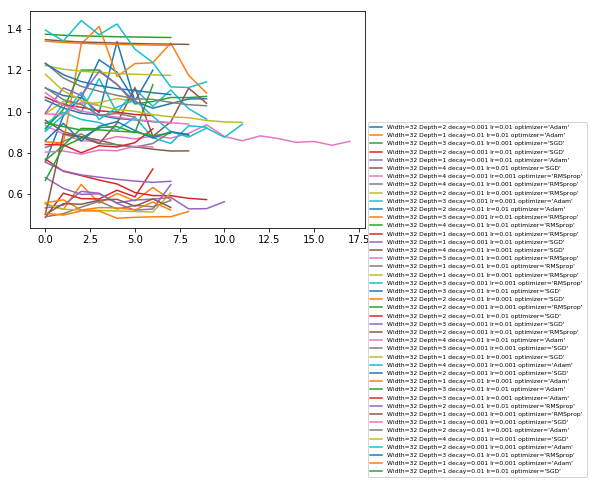

In [7]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==32, MyModels), ["History","val_loss"],loc=0)

In [ ]:
# Plot a varible for all trainings. This was pulled together above.
PlotMetaData(MyModels,["All_History.val_loss"],loc="center left")

In [ ]:
PlotMetaData(SelectModels(MyModels,lambda(m): m.MetaData["lr"]==0.01),["All_History.val_loss"],loc="center left")

In [ ]:
MyModels[0].MetaData["lr"]
